# Analysis of binary Fresnel Lens

With the modules diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light only the propagation to a given distances is performed. If you need to visualize the z propagation it is better the use of `diffractio.scalar_fields_XZ`, since it performs a for loop over a number of distances given by a linspace array. This for loop is executed, when possible, using multiprocessing, since there is not computational interaction between different locations z. 

In [1]:
%matplotlib inline

In [4]:
# import modules
from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ


In [5]:
# initial data 
x0 = np.linspace(-250*um, 250*um, 4096)
wavelength = 0.6238 * um
focal=20*mm
radius=250*um

#definition of source
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

## Fresnel lens - phase

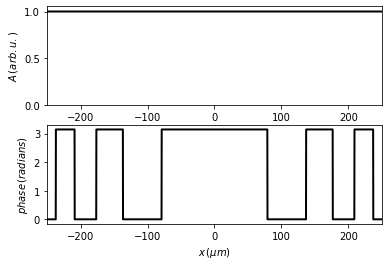

In [6]:
#definition of mask
t0 = Scalar_mask_X(x0, wavelength)
t0.fresnel_lens(
        x0=0 * um,
        radius=radius,
        focal=focal,
        mask=False,
        kind='phase',
        phase=sp.pi)
t0.draw(kind='field')

Propagation during a given interval

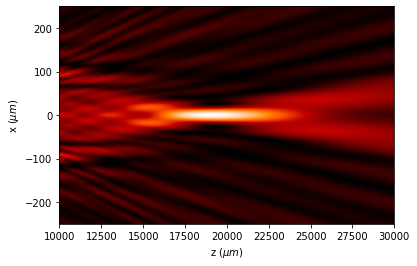

In [7]:
z0 = np.linspace(focal-10*mm, focal+10*mm, 64)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0*t0)
u1.RS()
u1.draw(logarithm=1, normalize='intensity', draw_borders=True)

You can even determine the position of focus and perform a profile

x = 0.061 um, z = 18888.889 um


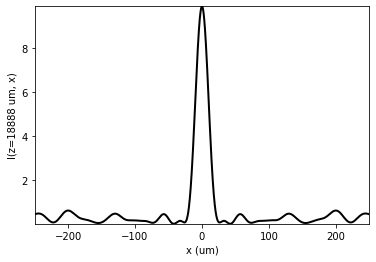

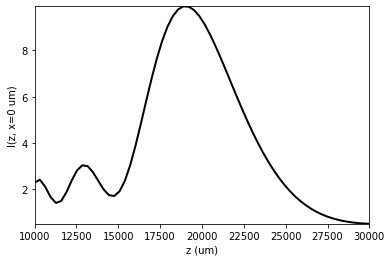

In [8]:
x_f, z_f = u1.search_focus(verbose=True)

u1.profile_transversal(z0=z_f, draw=True, filename='')
u1.profile_longitudinal(x0=x_f, draw=True, filename='');